# Importing Pandas and loading and cleanig data set

### This code loads a CSV file and cleans the data by removing columns with over 50% missing values, dropping rows with any nulls or duplicates, and standardizing column names by making them lowercase and replacing spaces with underscores

In [779]:
import pandas as pd

# Load CSV file
df = pd.read_csv('X2.csv')

# Preview the data
df.head()

# Overview of columns, data types, and missing values
df.info()

# Check how many missing values each column has
print(df.isnull().sum())

# Drop columns with more than 50% missing values (optional threshold)
df = df.loc[:, df.isnull().mean() < 0.5]

# Drop rows with any null values
df = df.dropna()

df = df.drop_duplicates()

# Strip spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13889 non-null  object 
 1   Gnrc_Name                        13889 non-null  object 
 2   Tot_Mftr                         13889 non-null  int64  
 3   Mftr_Name                        13889 non-null  object 
 4   Tot_Spndng_2018                  9647 non-null   float64
 5   Tot_Dsg_Unts_2018                9647 non-null   float64
 6   Tot_Clms_2018                    9647 non-null   float64
 7   Tot_Benes_2018                   9573 non-null   float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  9647 non-null   float64
 9   Avg_Spnd_Per_Clm_2018            9647 non-null   float64
 10  Avg_Spnd_Per_Bene_2018           9478 non-null   float64
 11  Outlier_Flag_2018                9645 non-null   float64
 12  Tot_Spndng_2019   

In [780]:
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
Index: 9106 entries, 0 to 13887
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   brnd_name                        9106 non-null   object 
 1   gnrc_name                        9106 non-null   object 
 2   tot_mftr                         9106 non-null   int64  
 3   mftr_name                        9106 non-null   object 
 4   tot_spndng_2018                  9106 non-null   float64
 5   tot_dsg_unts_2018                9106 non-null   float64
 6   tot_clms_2018                    9106 non-null   float64
 7   tot_benes_2018                   9106 non-null   float64
 8   avg_spnd_per_dsg_unt_wghtd_2018  9106 non-null   float64
 9   avg_spnd_per_clm_2018            9106 non-null   float64
 10  avg_spnd_per_bene_2018           9106 non-null   float64
 11  outlier_flag_2018                9106 non-null   float64
 12  tot_spndng_2019         

,brnd_name,gnrc_name,tot_mftr,mftr_name,tot_spndng_2018,tot_dsg_unts_2018,tot_clms_2018,tot_benes_2018,avg_spnd_per_dsg_unt_wghtd_2018,avg_spnd_per_clm_2018,...,tot_spndng_2022,tot_dsg_unts_2022,tot_clms_2022,tot_benes_2022,avg_spnd_per_dsg_unt_wghtd_2022,avg_spnd_per_clm_2022,avg_spnd_per_bene_2022,outlier_flag_2022,chg_avg_spnd_per_dsg_unt_21_22,cagr_avg_spnd_per_dsg_unt_18_22
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,167193.78,761658.0,6538.0,2341.0,0.219785,25.572619,...,70039.61,310304.0,2501,1147.0,0.225874,28.004642,61.063304,0.0,0.012882,0.006855
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,167193.78,761658.0,6538.0,2341.0,0.219785,25.572619,...,70039.61,310304.0,2501,1147.0,0.225874,28.004642,61.063304,0.0,0.012882,0.006855
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,369402.85,1813908.0,14931.0,5674.0,0.203658,24.740664,...,114601.54,486206.0,3846,1474.0,0.235708,29.797592,77.748670,0.0,0.012441,0.037214
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,369402.85,1813908.0,14931.0,5674.0,0.203658,24.740664,...,114601.54,486206.0,3846,1474.0,0.235708,29.797592,77.748670,0.0,0.012441,0.037214
4,Abacavir,Abacavir Sulfate,6,Overall,10653423.32,3034767.0,40388.0,7359.0,4.032155,263.776947,...,6945563.71,2035106.0,24317,3452.0,3.871236,285.625847,2012.040472,0.0,0.214564,-0.010130


# Random Forest before tuning

### This code prepares data for analysis by converting all columns to numeric, dropping rows where the target (avg_spnd_per_dsg_unt_wghtd_2022) is missing, and keeping only numeric columns. It then checks if the target is numeric and, if so, calculates and prints the correlation of all other numeric features with the target, sorted by strength.

In [782]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Force conversion of all relevant numeric columns
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# dropping rows where the target is missing (if any)
target = 'avg_spnd_per_dsg_unt_wghtd_2022'
df = df.dropna(subset=[target])

#  selecting only numeric columns
numeric_df= df.select_dtypes(include='number')

# Confirm it's now available
if target in numeric_df.columns:
    correlation_matrix = numeric_df.corr()
    target_corr = correlation_matrix[target].drop(target).sort_values(ascending=False)

    print("Top correlated features with target:")
    print(target_corr)
else:
    print(f"Target column '{target}' still not found as numeric. Check values.")

Top correlated features with target:
avg_spnd_per_dsg_unt_wghtd_2019    0.974337
avg_spnd_per_dsg_unt_wghtd_2021    0.972908
avg_spnd_per_dsg_unt_wghtd_2018    0.972168
avg_spnd_per_dsg_unt_wghtd_2020    0.972128
avg_spnd_per_clm_2018              0.340777
avg_spnd_per_clm_2019              0.340230
avg_spnd_per_clm_2020              0.339624
avg_spnd_per_clm_2021              0.339159
avg_spnd_per_clm_2022              0.335682
avg_spnd_per_bene_2022             0.273964
avg_spnd_per_bene_2021             0.268494
avg_spnd_per_bene_2020             0.266677
avg_spnd_per_bene_2019             0.258002
avg_spnd_per_bene_2018             0.240370
tot_spndng_2022                    0.061612
tot_spndng_2021                    0.057022
tot_spndng_2020                    0.056668
tot_spndng_2019                    0.056619
tot_spndng_2018                    0.052466
cagr_avg_spnd_per_dsg_unt_18_22    0.038669
outlier_flag_2018                  0.026960
outlier_flag_2020                  0.01

### Top 4 corralted target values selected

In [783]:
top_n = 4  # You can change this number
selected_features = target_corr.head(top_n).index.tolist()
print("Using these features:", selected_features)

Using these features: ['avg_spnd_per_dsg_unt_wghtd_2019', 'avg_spnd_per_dsg_unt_wghtd_2021', 'avg_spnd_per_dsg_unt_wghtd_2018', 'avg_spnd_per_dsg_unt_wghtd_2020']


### This code trains a Random Forest regression model using the most correlated numeric features to predict a target variable. It cleans the data, splits it into training and testing sets, fits the model, evaluates it with RMSE, R², and MAE, then visualizes the actual vs. predicted values and shows the importance of each feature.

RMSE: 237.16
R² score: 0.977
MAE: 16.17


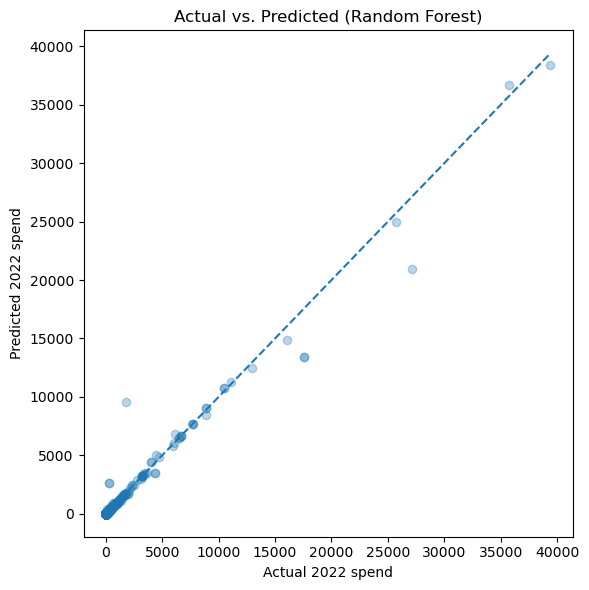

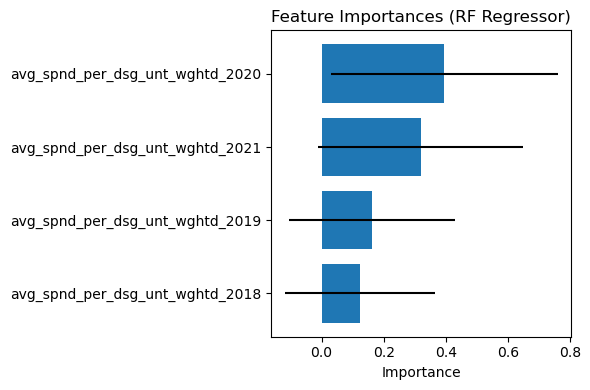

In [784]:
base_features = target_corr
# 3) Drop any rows missing feature or target values
df_model = df.dropna(subset=selected_features + [target])

# 4) Split into train/test sets (70% train / 30% test)
X = df_model[selected_features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5) Training of Random Forest regressor
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

# 6) Making predictions & evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.3f}")
print(f"MAE: {mae:.2f}")


# 7) Plotting actual vs. predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
_min = min(y_test.min(), y_pred.min())
_max = max(y_test.max(), y_pred.max())
plt.plot([_min, _max], [_min, _max], linestyle='--')
plt.xlabel('Actual 2022 spend')
plt.ylabel('Predicted 2022 spend')
plt.title('Actual vs. Predicted (Random Forest)')
plt.tight_layout()
plt.show()

# 8) Feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feat_imp = pd.DataFrame({
    'feature': selected_features,
    'importance': importances,
    'std': std
}).sort_values('importance', ascending=True)

plt.figure(figsize=(6,4))
plt.barh(feat_imp['feature'], feat_imp['importance'], xerr=feat_imp['std'])
plt.xlabel('Importance')
plt.title('Feature Importances (RF Regressor)')
plt.tight_layout()
plt.show()


## This code evaluates the Random Forest model on the training set by calculating the RMSE and R², then compares these metrics with those from the test set. It helps identify overfitting if training performance is much better than test performance.

In [786]:
y_train_pred = rf.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.3f}")
print(f"Test  RMSE: {rmse:.2f}, R²: {r2:.3f}")

Train RMSE: 131.04, R²: 0.990
Test  RMSE: 237.16, R²: 0.977


# RandomForest Regressor after tuning 

In [788]:
top_n = 4  # You can change this number
selected_features = target_corr.head(top_n).index.tolist()
print("Using these features:", selected_features)

Using these features: ['avg_spnd_per_dsg_unt_wghtd_2019', 'avg_spnd_per_dsg_unt_wghtd_2021', 'avg_spnd_per_dsg_unt_wghtd_2018', 'avg_spnd_per_dsg_unt_wghtd_2020']


### This updated code builds a Random Forest regression model with 250 trees to predict the 2022 spending variable. It selects key features based on correlation, removes incomplete rows, splits the data into training and test sets (70/30), and trains the model. It evaluates performance using RMSE, R², and MAE, visualizes predictions vs. actual values, and plots feature importances to show which inputs most influenced the predictions.

RMSE: 226.00
R² score: 0.979
MAE: 15.73


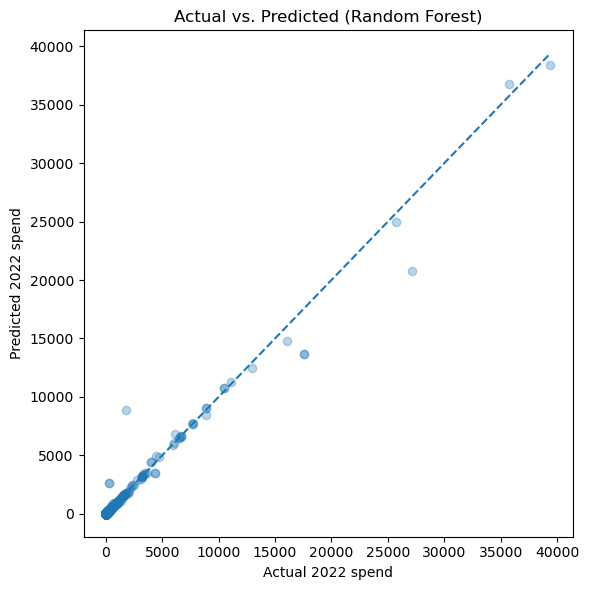

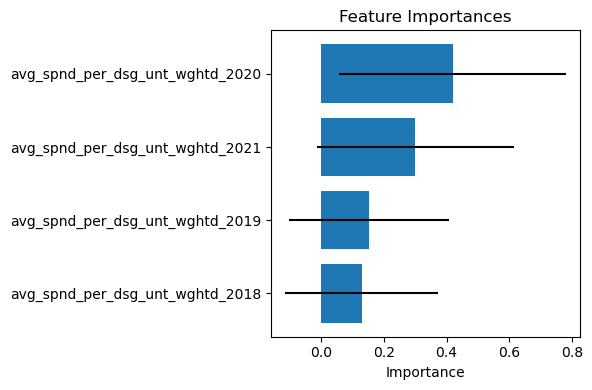

In [789]:
base_features = target_corr
# 3) Drop any rows missing feature or target values
df_model = df.dropna(subset=selected_features + [target])

# 4) Split into train/test sets (70% train / 30% test)
X = df_model[selected_features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5) Training of Random Forest regressor
rf = RandomForestRegressor(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

# 6) Making predictions & evaluate
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.3f}")
print(f"MAE: {mae:.2f}")


# 7) Plotting actual vs. predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
_min = min(y_test.min(), y_pred.min())
_max = max(y_test.max(), y_pred.max())
plt.plot([_min, _max], [_min, _max], linestyle='--')
plt.xlabel('Actual 2022 spend')
plt.ylabel('Predicted 2022 spend')
plt.title('Actual vs. Predicted (Random Forest)')
plt.tight_layout()
plt.show()

# 8) Feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
feat_imp = pd.DataFrame({
    'feature': selected_features,
    'importance': importances,
    'std': std
}).sort_values('importance', ascending=True)

plt.figure(figsize=(6,4))
plt.barh(feat_imp['feature'], feat_imp['importance'], xerr=feat_imp['std'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


# XGboost Before Fine Tuning

In [791]:
!pip install xgboost

In [792]:
import xgboost as xgb  
from sklearn.preprocessing import StandardScaler 

In [793]:
# Target variable
target = "avg_spnd_per_dsg_unt_wghtd_2022" 
features = [col for col in df.columns if col != target]

In [794]:
corr_with_target = df_model[features + [target]].corr()[target].drop(target)
sorted_corr = corr_with_target.abs().sort_values(ascending=False)
top_features = sorted_corr.head(8).index.tolist()

print("Top correlated features:")
print(top_features)

Top correlated features:
['avg_spnd_per_dsg_unt_wghtd_2019', 'avg_spnd_per_dsg_unt_wghtd_2021', 'avg_spnd_per_dsg_unt_wghtd_2018', 'avg_spnd_per_dsg_unt_wghtd_2020', 'avg_spnd_per_clm_2018', 'avg_spnd_per_clm_2019', 'avg_spnd_per_clm_2020', 'avg_spnd_per_clm_2021']


In [795]:
# Feature matrix and target vector
X = df_model[top_features]
y = df_model[target]

In [796]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

### This code trains an XGBoost regression model using training data to predict 2022 spending. It uses 150 estimators and a learning rate of 0.1. After training, it evaluates the model on the test set using RMSE, R², and MAE, and visualizes the actual vs. predicted values in a scatter plot to assess prediction accuracy.

C:\Users\dhrut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 821.37
R² score: 0.721
MAE: 62.06


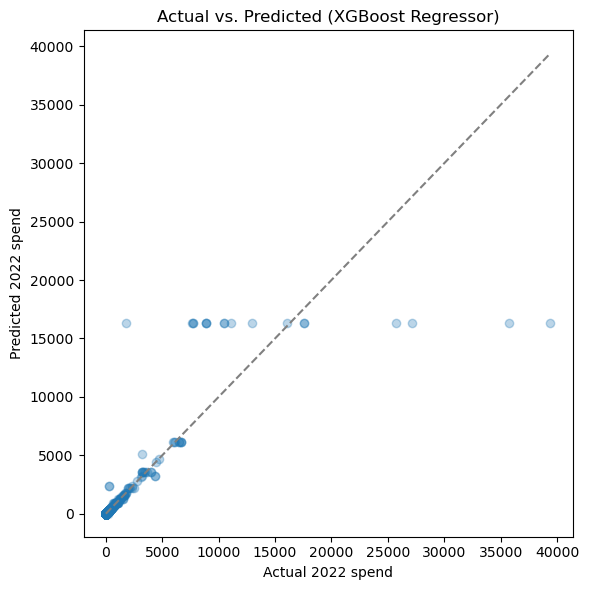

In [797]:
# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=150, learning_rate=0.1)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.3f}")
print(f"MAE: {mae:.2f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
_min, _max = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([_min, _max], [_min, _max], '--', color='gray')
plt.xlabel('Actual 2022 spend')
plt.ylabel('Predicted 2022 spend')
plt.title('Actual vs. Predicted (XGBoost Regressor)')
plt.tight_layout()
plt.show()

### This code trains an XGBoost regression model on standardized features to predict 2022 spending. It uses top_features as input, scales them using StandardScaler, splits the data into training and test sets, and fits the model with 650 trees and a learning rate of 0.3. Model performance is evaluated using RMSE, R², and MAE, and a scatter plot compares actual vs. predicted values to visualize prediction accuracy.

# Fine tuning of XGboost 


C:\Users\dhrut\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 585.0244
R² Score: 0.8584
MAE: 32.84


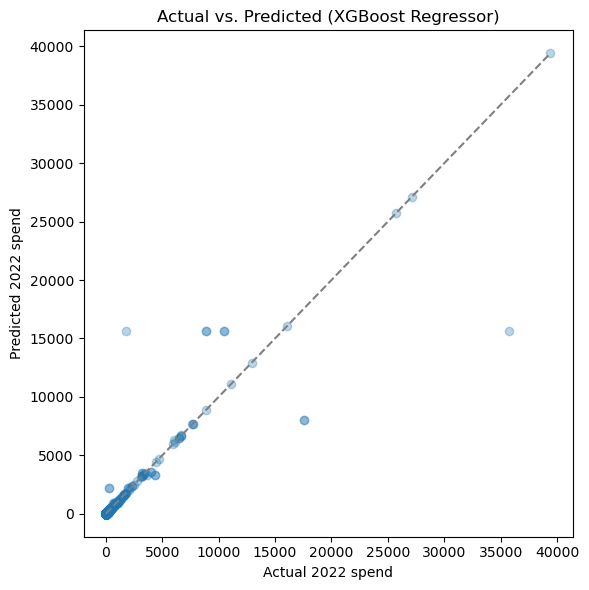

In [799]:
# Target variable
target = "avg_spnd_per_dsg_unt_wghtd_2022"

# Feature matrix and target vector
X = df_model[top_features]
y = df_model[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=650, learning_rate=0.3)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
_min, _max = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([_min, _max], [_min, _max], '--', color='gray')
plt.xlabel('Actual 2022 spend')
plt.ylabel('Predicted 2022 spend')
plt.title('Actual vs. Predicted (XGBoost Regressor)')
plt.tight_layout()
plt.show()

# KNN before hypertuning

In [801]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
# Load the CSV file
df = pd.read_csv('X2.csv')

# Preview the data
df.head()

# Overview of columns, data types, and missing values
df.info()

# Check how many missing values each column has
print(df.isnull().sum())

# Drop columns with more than 50% missing values (optional threshold)
df = df.loc[:, df.isnull().mean() < 0.5]

# Drop rows with any null values
df = df.dropna()

df = df.drop_duplicates()

# Strip spaces and convert to lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13889 non-null  object 
 1   Gnrc_Name                        13889 non-null  object 
 2   Tot_Mftr                         13889 non-null  int64  
 3   Mftr_Name                        13889 non-null  object 
 4   Tot_Spndng_2018                  9647 non-null   float64
 5   Tot_Dsg_Unts_2018                9647 non-null   float64
 6   Tot_Clms_2018                    9647 non-null   float64
 7   Tot_Benes_2018                   9573 non-null   float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  9647 non-null   float64
 9   Avg_Spnd_Per_Clm_2018            9647 non-null   float64
 10  Avg_Spnd_Per_Bene_2018           9478 non-null   float64
 11  Outlier_Flag_2018                9645 non-null   float64
 12  Tot_Spndng_2019   

In [802]:
# Set target variable
target = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Drop non-numeric or irrelevant columns if necessary (adjust as needed)
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.2].index.drop(target)  # keep features with corr > 0.5

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021', 'Avg_Spnd_Per_Clm_2022', 'Avg_Spnd_Per_Bene_2022', 'Avg_Spnd_Per_Bene_2021', 'Avg_Spnd_Per_Bene_2020', 'Avg_Spnd_Per_Bene_2019', 'Avg_Spnd_Per_Bene_2018']


### This code implements a K-Nearest Neighbors (KNN) regression model to predict a target variable. It splits the data into training, validation, and test sets, trains the model with n_neighbors=5, and evaluates performance on the test set using R², MAE, and RMSE. Finally, it visualizes how well the model's predictions align with actual values in a scatter plot.

R² Score: 0.4351
MAE: 122.3268
RMSE: 1058.3613


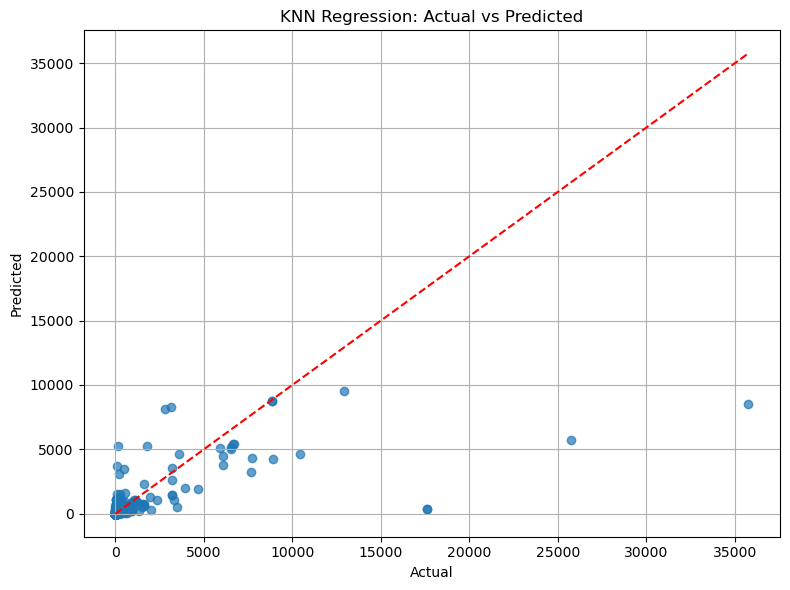

In [803]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Train-test-validation split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# KNN training (you can tune n_neighbors)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}") 

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# KNN After hypertuning

## changed number of features included in the model

In [806]:
# Set target variable
target = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Drop non-numeric or irrelevant columns if necessary (adjust as needed)
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.5].index.drop(target)  # keep features with corr > 0.5

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020']


### This code applies K-Nearest Neighbors (KNN) regression to predict a target variable using selected numeric features. It splits the dataset into training, validation, and test sets (60%/20%/20%), fits a KNN model with 5 neighbors, and evaluates it using R², MAE, and RMSE on the test set. A scatter plot then visualizes how closely the predicted values match the actual ones.

R² Score: 0.9411
MAE: 23.8171
RMSE: 341.7421


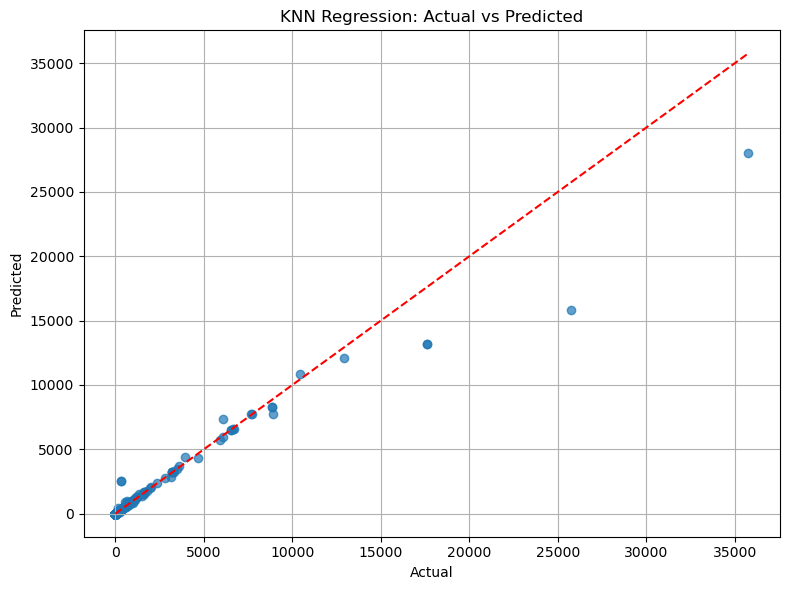

In [807]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Train-test-validation split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# KNN training (you can tune n_neighbors)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [808]:
y_train_pred = knn.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R²: {r2_train:.4f}")

Training R²: 0.9255


# LightGBM before hypertuning

In [810]:
# Standard install from PyPI
!pip install lightgbm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMRegressor


# Load the CSV file
df = pd.read_csv('X2.csv')

# Preview the data
df.head()

# Overview of columns, data types, and missing values
df.info()

# Check how many missing values each column has
print(df.isnull().sum())

# Drop columns with more than 50% missing values (optional threshold)
df = df.loc[:, df.isnull().mean() < 0.5]

# Drop rows with any null values
df = df.dropna()

df = df.drop_duplicates()

# Strip spaces and convert to lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13889 non-null  object 
 1   Gnrc_Name                        13889 non-null  object 
 2   Tot_Mftr                         13889 non-null  int64  
 3   Mftr_Name                        13889 non-null  object 
 4   Tot_Spndng_2018                  9647 non-null   float64
 5   Tot_Dsg_Unts_2018                9647 non-null   float64
 6   Tot_Clms_2018                    9647 non-null   float64
 7   Tot_Benes_2018                   9573 non-null   float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  9647 non-null   float64
 9   Avg_Spnd_Per_Clm_2018            9647 non-null   float64
 10  Avg_Spnd_Per_Bene_2018           9478 non-null   float64
 11  Outlier_Flag_2018                9645 non-null   float64
 12  Tot_Spndng_2019   

In [811]:
# Set the target variable
target = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Use only numeric columns for LightGBM
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.1].index.drop(target)

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021', 'Avg_Spnd_Per_Clm_2022', 'Avg_Spnd_Per_Bene_2022', 'Avg_Spnd_Per_Bene_2021', 'Avg_Spnd_Per_Bene_2020', 'Avg_Spnd_Per_Bene_2019', 'Avg_Spnd_Per_Bene_2018']


### This code uses LightGBM regression to model a target variable based on selected numeric features. It splits the data into training (60%), validation (20%), and test (20%) sets. A LGBMRegressor with 1000 estimators is trained using early stopping, which halts training if the validation RMSE doesn't improve for 50 rounds. After training, the model predicts on the test set and is evaluated using R², MAE, and RMSE.

In [812]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Split data: 60% train, 20% validation, 20% test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# Create LightGBM model
model = LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    random_state=42,
    verbosity=-1
)

# Fit with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(50)
    ]
)


# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1065.45	valid_0's l2: 1.13519e+06
[100]	valid_0's rmse: 953.763	valid_0's l2: 909663
[150]	valid_0's rmse: 867.826	valid_0's l2: 753121
[200]	valid_0's rmse: 795.759	valid_0's l2: 633232
[250]	valid_0's rmse: 732.142	valid_0's l2: 536032
[300]	valid_0's rmse: 682.571	valid_0's l2: 465903
[350]	valid_0's rmse: 641.034	valid_0's l2: 410924
[400]	valid_0's rmse: 609.614	valid_0's l2: 371629
[450]	valid_0's rmse: 587.013	valid_0's l2: 344585
[500]	valid_0's rmse: 569.767	valid_0's l2: 324634
[550]	valid_0's rmse: 556.368	valid_0's l2: 309545
[600]	valid_0's rmse: 544.516	valid_0's l2: 296498
[650]	valid_0's rmse: 534.372	valid_0's l2: 285553
[700]	valid_0's rmse: 525.985	valid_0's l2: 276661
[750]	valid_0's rmse: 519.12	valid_0's l2: 269485
[800]	valid_0's rmse: 514.2	valid_0's l2: 264402
[850]	valid_0's rmse: 510.227	valid_0's l2: 260332
[900]	valid_0's rmse: 508.847	valid_0's l2: 258925
[950]	valid_0's rmse


LightGBM Performance:
R² Score: 0.8171
MAE: 49.7999
RMSE: 602.2184


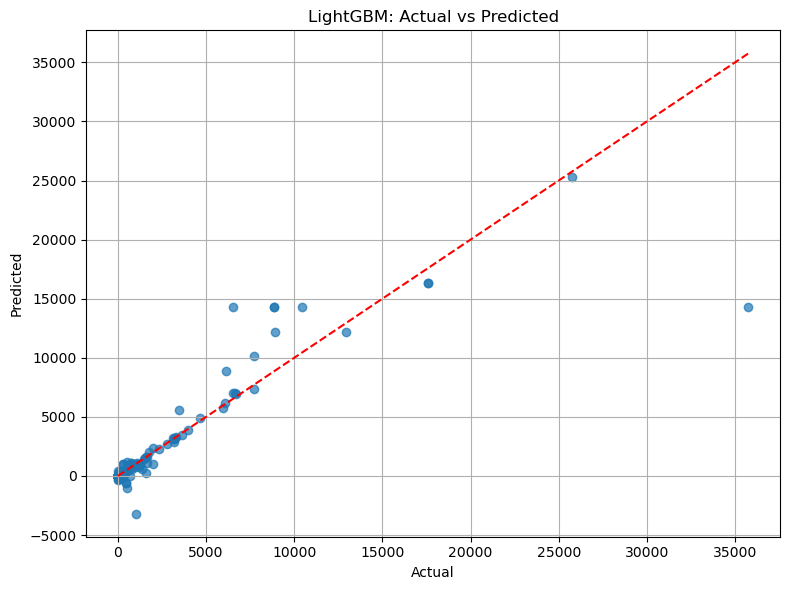

In [813]:
print(f"\nLightGBM Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LightGBM: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# LightGBM after hyptertuning

## changing corelated columns

In [816]:
# Set the target variable
target = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Use only numeric columns for LightGBM
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.5].index.drop(target)

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020']


### This code trains a LightGBM regression model using selected features to predict a target variable. It splits the dataset into 60% training, 20% validation, and 20% test sets. The model uses up to 1000 estimators (trees) but includes early stopping, which halts training if the validation RMSE doesn't improve for 50 rounds. After training, it makes predictions on the test set and evaluates performance

In [817]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Split data: 60% train, 20% validation, 20% test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# Create LightGBM model
model = LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    random_state=42,
    verbosity=-1
)

# Fit with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(50)
    ]
)


# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1107.94	valid_0's l2: 1.22753e+06
[100]	valid_0's rmse: 1106.6	valid_0's l2: 1.22457e+06
[150]	valid_0's rmse: 1106.56	valid_0's l2: 1.22447e+06
Early stopping, best iteration is:
[144]	valid_0's rmse: 1106.55	valid_0's l2: 1.22445e+06



LightGBM Performance:
R² Score: 0.7082
MAE: 62.7838
RMSE: 760.6583


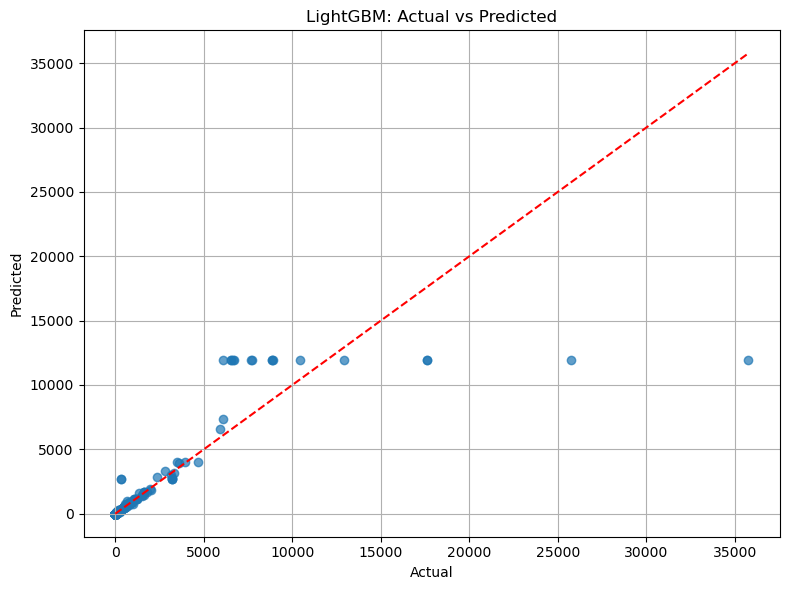

In [818]:
print(f"\nLightGBM Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LightGBM: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [819]:
#using previously used corelated columns, but tuning hyperparameters

In [820]:
# Set the target variable
target = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022'

# Drop rows with missing target
df = df.dropna(subset=[target])

# Use only numeric columns for LightGBM
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.1].index.drop(target)

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021', 'Avg_Spnd_Per_Clm_2022', 'Avg_Spnd_Per_Bene_2022', 'Avg_Spnd_Per_Bene_2021', 'Avg_Spnd_Per_Bene_2020', 'Avg_Spnd_Per_Bene_2019', 'Avg_Spnd_Per_Bene_2018']


### This updated code trains a LightGBM regression model with a higher limit of 1500 trees (n_estimators=1500). Like before, it splits the data into training (60%), validation (20%), and test (20%) sets. The model is trained with early stopping set to stop if validation RMSE doesn’t improve over 50 rounds. After training, it predicts the target values on the test set and evaluates the model using R², MAE, and RMSE to measure prediction accuracy and error.

In [821]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Split data: 60% train, 20% validation, 20% test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# Create LightGBM model
model = LGBMRegressor(
    objective='regression',
    n_estimators=1500,
    random_state=42,
    verbosity=-1
)

# Fit with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(50)
    ]
)


# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


Training until validation scores don't improve for 50 rounds
[50]	valid_0's rmse: 1065.45	valid_0's l2: 1.13519e+06
[100]	valid_0's rmse: 953.763	valid_0's l2: 909663
[150]	valid_0's rmse: 867.826	valid_0's l2: 753121
[200]	valid_0's rmse: 795.759	valid_0's l2: 633232
[250]	valid_0's rmse: 732.142	valid_0's l2: 536032
[300]	valid_0's rmse: 682.571	valid_0's l2: 465903
[350]	valid_0's rmse: 641.034	valid_0's l2: 410924
[400]	valid_0's rmse: 609.614	valid_0's l2: 371629
[450]	valid_0's rmse: 587.013	valid_0's l2: 344585
[500]	valid_0's rmse: 569.767	valid_0's l2: 324634
[550]	valid_0's rmse: 556.368	valid_0's l2: 309545
[600]	valid_0's rmse: 544.516	valid_0's l2: 296498
[650]	valid_0's rmse: 534.372	valid_0's l2: 285553
[700]	valid_0's rmse: 525.985	valid_0's l2: 276661
[750]	valid_0's rmse: 519.12	valid_0's l2: 269485
[800]	valid_0's rmse: 514.2	valid_0's l2: 264402
[850]	valid_0's rmse: 510.227	valid_0's l2: 260332
[900]	valid_0's rmse: 508.847	valid_0's l2: 258925
[950]	valid_0's rmse


LightGBM Performance:
R² Score: 0.8163
MAE: 49.4841
RMSE: 603.4541


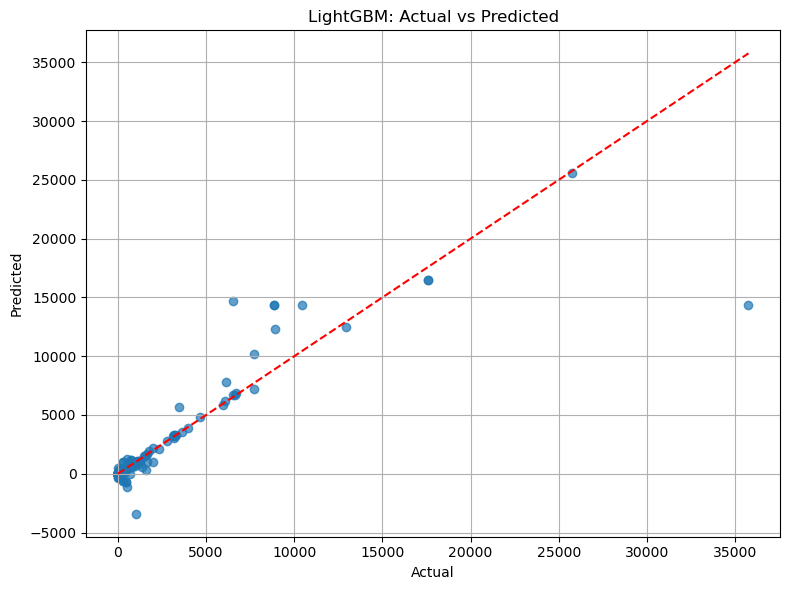

In [822]:
print(f"\nLightGBM Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("LightGBM: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression before hypertuning

In [824]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Load the CSV file
df = pd.read_csv('X2.csv')

# Preview the data
df.head()

# Overview of columns, data types, and missing values
df.info()

# Check how many missing values each column has
print(df.isnull().sum())

# Drop columns with more than 50% missing values (optional threshold)
df = df.loc[:, df.isnull().mean() < 0.5]

# Drop rows with any null values
df = df.dropna()

df = df.drop_duplicates()

# Strip spaces and convert to lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13889 non-null  object 
 1   Gnrc_Name                        13889 non-null  object 
 2   Tot_Mftr                         13889 non-null  int64  
 3   Mftr_Name                        13889 non-null  object 
 4   Tot_Spndng_2018                  9647 non-null   float64
 5   Tot_Dsg_Unts_2018                9647 non-null   float64
 6   Tot_Clms_2018                    9647 non-null   float64
 7   Tot_Benes_2018                   9573 non-null   float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  9647 non-null   float64
 9   Avg_Spnd_Per_Clm_2018            9647 non-null   float64
 10  Avg_Spnd_Per_Bene_2018           9478 non-null   float64
 11  Outlier_Flag_2018                9645 non-null   float64
 12  Tot_Spndng_2019   

In [825]:
target = 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2022'

In [826]:
# Drop rows with missing target
df = df.dropna(subset=[target])

# Use only numeric columns for regression
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.1].index.drop(target)  # Adjust threshold as needed

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020', 'Avg_Spnd_Per_Clm_2018', 'Avg_Spnd_Per_Clm_2019', 'Avg_Spnd_Per_Clm_2020', 'Avg_Spnd_Per_Clm_2021', 'Avg_Spnd_Per_Clm_2022', 'Avg_Spnd_Per_Bene_2022', 'Avg_Spnd_Per_Bene_2021', 'Avg_Spnd_Per_Bene_2020', 'Avg_Spnd_Per_Bene_2019', 'Avg_Spnd_Per_Bene_2018']


### This code trains a Linear Regression model to predict a target variable using selected numeric features. It first normalizes the features with StandardScaler, then splits the data into training (60%), validation (20%), and test (20%) sets. The model is trained on the training data, and predictions are made on the test set. Evaluation metrics — R², MAE, and RMSE — are calculated to assess how well the model performs on unseen data.

In [827]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test-validation split (60% train, 20% val, 20% test)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


Linear Regression Performance:
R² Score: 0.9675
MAE: 55.9986
RMSE: 253.8336


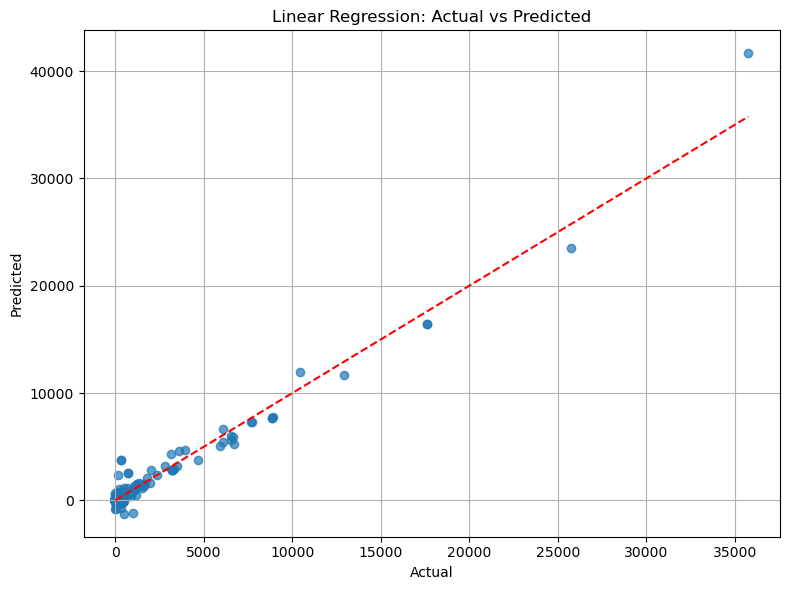

In [828]:
print(f"\nLinear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [830]:
# Predict on training data
y_train_pred = lr.predict(X_train)

# Training evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Print training vs test metrics
print(f"Training R²: {r2_train:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Training R²: 0.9790
Training MAE: 44.5571
Training RMSE: 181.6592
------------------------------
Test R²: 0.9675
Test MAE: 55.9986
Test RMSE: 253.8336


# Linear Regression After hypertuning

## changed feature columns 


In [835]:
# Drop rows with missing target
df = df.dropna(subset=[target])

# Use only numeric columns for regression
df_numeric = df.select_dtypes(include=[np.number])

# Correlation-based feature selection
cor_matrix = df_numeric.corr()
top_features = cor_matrix[target].abs().sort_values(ascending=False)
selected_features = top_features[top_features > 0.5].index.drop(target)  # Adjust threshold as needed

print("Selected features based on correlation:\n", selected_features.tolist())

Selected features based on correlation:
 ['Avg_Spnd_Per_Dsg_Unt_Wghtd_2019', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2021', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2018', 'Avg_Spnd_Per_Dsg_Unt_Wghtd_2020']


### This code trains and evaluates a Linear Regression model after normalizing the features and splitting the data into training (60%), validation (20%), and test (20%) sets. The model is trained on the training set and evaluated using R², MAE, and RMSE on the test set. Additionally, the number of columns used in selected_features has been reduced from the top 8 to the top 4 most correlated features to simplify the model and focus on the most relevant predictors.

In [837]:
# Define features and target
X = df_numeric[selected_features]
y = df_numeric[target]

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test-validation split (60% train, 20% val, 20% test)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


Linear Regression Performance:
R² Score: 0.9785
MAE: 36.2702
RMSE: 206.4875


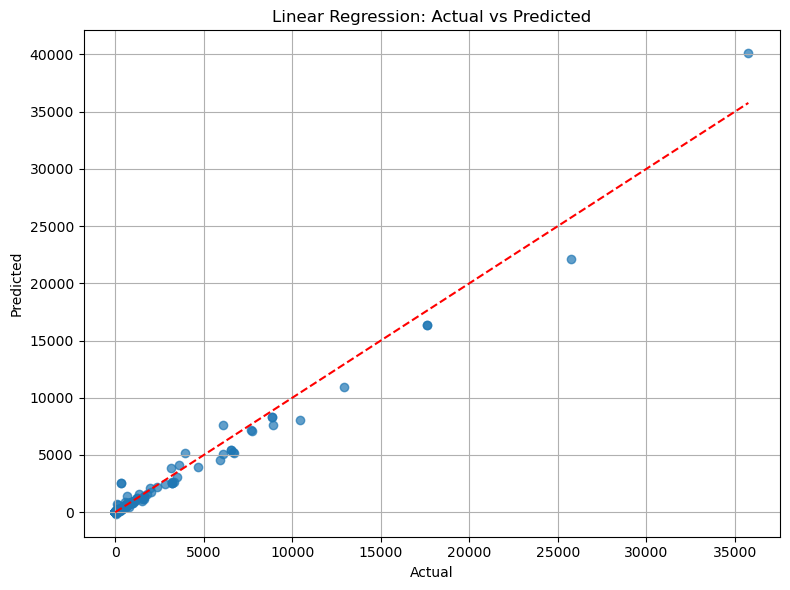

In [839]:
print(f"\nLinear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [842]:
# Predict on training data
y_train_pred = lr.predict(X_train)

# Training evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Print training vs test metrics
print(f"Training R²: {r2_train:.4f}")
print(f"Training MAE: {mae_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")

Training R²: 0.9529
Training MAE: 31.4343
Training RMSE: 271.9650
------------------------------
Test R²: 0.9785
Test MAE: 36.2702
Test RMSE: 206.4875


# Decision tree regressor

In [846]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [848]:
# Load your dataset
df = pd.read_csv("X2.csv")  # Replace with your file path

In [850]:
# Preview the data
df.head()

# Overview of columns, data types, and missing values
df.info()

# Check how many missing values each column has
print(df.isnull().sum())

# Drop columns with more than 50% missing values (optional threshold)
df = df.loc[:, df.isnull().mean() < 0.5]

# Drop rows with any null values
df = df.dropna()

df = df.drop_duplicates()

# Strip spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13889 non-null  object 
 1   Gnrc_Name                        13889 non-null  object 
 2   Tot_Mftr                         13889 non-null  int64  
 3   Mftr_Name                        13889 non-null  object 
 4   Tot_Spndng_2018                  9647 non-null   float64
 5   Tot_Dsg_Unts_2018                9647 non-null   float64
 6   Tot_Clms_2018                    9647 non-null   float64
 7   Tot_Benes_2018                   9573 non-null   float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  9647 non-null   float64
 9   Avg_Spnd_Per_Clm_2018            9647 non-null   float64
 10  Avg_Spnd_Per_Bene_2018           9478 non-null   float64
 11  Outlier_Flag_2018                9645 non-null   float64
 12  Tot_Spndng_2019   

In [852]:
target = "Avg_Spnd_Per_Dsg_Unt_Wghtd_2022"

In [854]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# dropping rows where the target is missing (if any)
target = 'avg_spnd_per_dsg_unt_wghtd_2022'
df = df.dropna(subset=[target])

#  selecting only numeric columns
numeric_df = df.select_dtypes(include='number')

# Confirm it's now available
if target in numeric_df.columns:
    correlation_matrix = numeric_df.corr()
    target_corr = correlation_matrix[target].drop(target).sort_values(ascending=False)

    print("Top correlated features with target:")
    print(target_corr)
else:
    print(f"Target column '{target}' still not found as numeric. Check values.")

Top correlated features with target:
avg_spnd_per_dsg_unt_wghtd_2019    0.974337
avg_spnd_per_dsg_unt_wghtd_2021    0.972908
avg_spnd_per_dsg_unt_wghtd_2018    0.972168
avg_spnd_per_dsg_unt_wghtd_2020    0.972128
avg_spnd_per_clm_2018              0.340777
avg_spnd_per_clm_2019              0.340230
avg_spnd_per_clm_2020              0.339624
avg_spnd_per_clm_2021              0.339159
avg_spnd_per_clm_2022              0.335682
avg_spnd_per_bene_2022             0.273964
avg_spnd_per_bene_2021             0.268494
avg_spnd_per_bene_2020             0.266677
avg_spnd_per_bene_2019             0.258002
avg_spnd_per_bene_2018             0.240370
tot_spndng_2022                    0.061612
tot_spndng_2021                    0.057022
tot_spndng_2020                    0.056668
tot_spndng_2019                    0.056619
tot_spndng_2018                    0.052466
cagr_avg_spnd_per_dsg_unt_18_22    0.038669
outlier_flag_2018                  0.026960
outlier_flag_2020                  0.01

In [856]:
top_n = 8  # You can change this number
selected_features = target_corr.head(top_n).index.tolist()
print("Using these features:", selected_features)

Using these features: ['avg_spnd_per_dsg_unt_wghtd_2019', 'avg_spnd_per_dsg_unt_wghtd_2021', 'avg_spnd_per_dsg_unt_wghtd_2018', 'avg_spnd_per_dsg_unt_wghtd_2020', 'avg_spnd_per_clm_2018', 'avg_spnd_per_clm_2019', 'avg_spnd_per_clm_2020', 'avg_spnd_per_clm_2021']


### This code trains a Decision Tree Regressor with a maximum depth of 5 to predict the target variable. The data is split into training and test sets (70/30), and the model is fitted on the training data. Predictions are made for both training and test sets, and model performance is evaluated using RMSE, R², and MAE on the test data.

In [858]:
# Feature matrix and target
X = df[selected_features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)


 RMSE   : 436.62
 R²     : 0.921
 MAE : 29.17


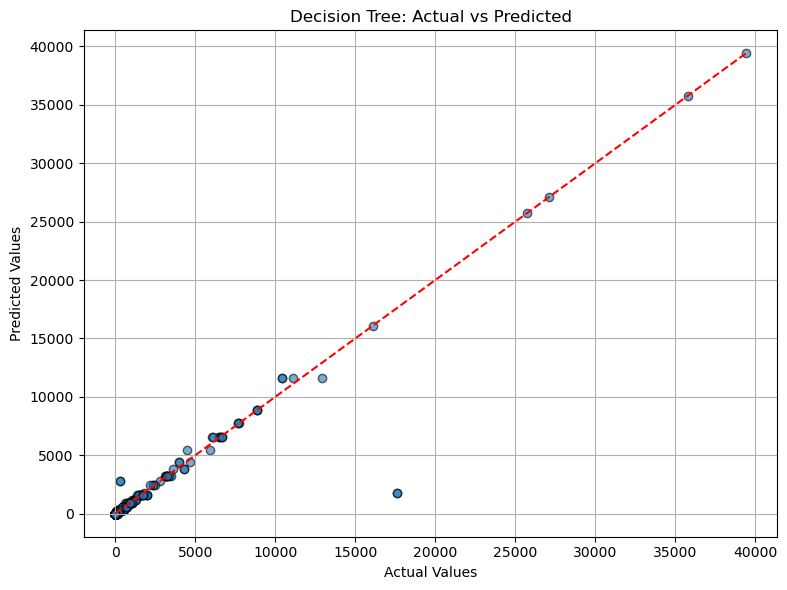

In [860]:
print(f"\n RMSE   : {rmse:.2f}")
print(f" R²     : {r2:.3f}")
print(f" MAE : {mae:.2f}")

import matplotlib.pyplot as plt

# Plot actual vs predicted for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

In [861]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R²:", train_r2)
print("Test R²:", test_r2)

Train R²: 0.9987267030768604
Test R²: 0.9211214935605262


## Changing features in the column

In [867]:
top_n = 4  # You can change this number
selected_features = target_corr.head(top_n).index.tolist()
print("Using these features:", selected_features)

Using these features: ['avg_spnd_per_dsg_unt_wghtd_2019', 'avg_spnd_per_dsg_unt_wghtd_2021', 'avg_spnd_per_dsg_unt_wghtd_2018', 'avg_spnd_per_dsg_unt_wghtd_2020']


### This code trains and evaluates a Decision Tree Regressor with a maximum depth of 5 on a 70/30 train-test split. The model predicts the target variable, and its performance is measured using RMSE, R², and MAE on the test set. Additionally, the number of columns in selected_features has been reduced from the top 8 to the top 4 most correlated features to simplify the model and focus on the most impactful variables.

In [869]:
# Feature matrix and target
X = df[selected_features]
y = df[target]
    
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)


 RMSE   : 99.50
 R²     : 0.996
 MAE : 18.71


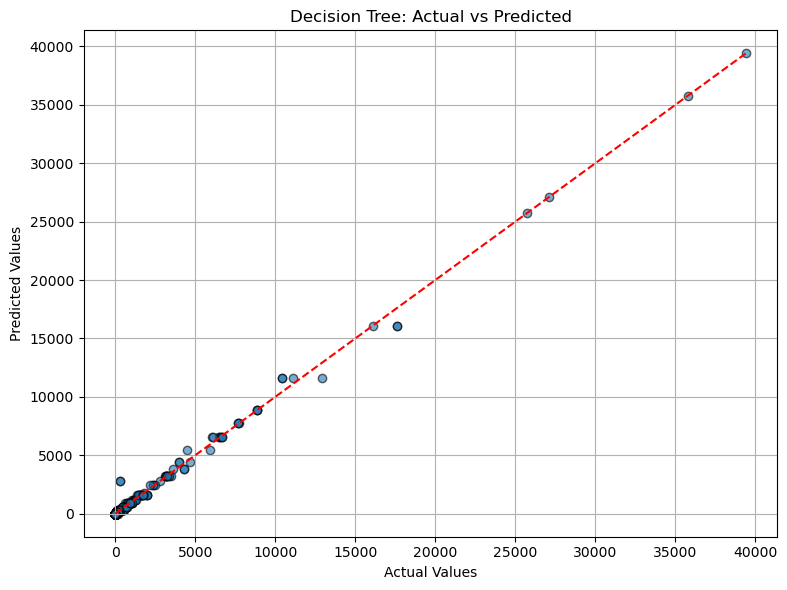

In [871]:
print(f"\n RMSE   : {rmse:.2f}")
print(f" R²     : {r2:.3f}")
print(f" MAE : {mae:.2f}")

import matplotlib.pyplot as plt

# Plot actual vs predicted for test data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()